In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
import glob

In [92]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

In [93]:
path = r'C:\Users\quynh\Documents'
all_files = glob.glob(path + "/*.csv")

In [99]:
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=None)
    li.append(df)

dfframe = pd.concat(li, axis=0, ignore_index=True, sort = False)

In [100]:
dfframe

,0,1,2,3,4
0,Logitech Wireless Keyboard and Mouse Combo,$17.88,4.5,1155 ratings,Be more productive in a variety of situations ...
1,"Apple Lightning to USB Cable, 3 ft",$3.99,3.8,627 ratings,Get more from your devices with the Apple Ligh...
2,Straight Talk $45 Unlimited 30-Day Plan e-PIN ...,$45.00,4.4,1567 ratings,e-PIN Top Up is the most flexible option for a...
3,Straight Talk LG Journey Smartphone,$39.88,4.2,98 ratings,Get the new LG Journey on Straight Talk! With ...
4,"Acer 315 15.6"" Celeron 4GB/32GB Chromebook, 15...",$272.88,4.6,1112 ratings,Google Classroom Compatible! Acer Chromebook 3...
...,...,...,...,...,...
3943,"L.O.L. Surprise! Queen Bee – Huggable, Soft Pl...",$19.88,4.9,7 ratings,Cuddle up with your favorite L.O.L. Surprise! ...
3944,Lullabrites™ Plush Animals - Unicorn,$14.84,4.7,31 ratings,Lullabrites™ Plush Unicorn Lights Up Plays Bed...
3945,Fisher-Price Groove & Glow BeatBo Plush with L...,$10.08,4.6,179 ratings,BeatBo is more than a plush toy that baby can ...
3946,Rubie's Marvel Hulk Child Halloween Costume,$15.00,4.9,7 ratings,Watch your little Bruce Banner transform in th...


In [101]:
df[4].fillna(0, inplace = True)

In [102]:
l1 = [] 
for i in df[4]: 
    l1.append(str(i))
l1

['The Nerf Fortnite SP-L blaster is inspired by the blaster used in Fortnite, replicating the look and colors of the one from the popular video game! Play Fortnite in real life with this Nerf Elite blaster that has a detachable barrel to customize for different ways to play. Attach the barrel for distance targeting; remove the barrel when you need a more compact look for smaller play areas or when you need to move fast and stay mobile. The Fortnite SP-L blaster has an internal clip with a 3-dart capacity, so you can load 3 darts in a row before it?s time to reload. Insert 3 darts, prime, and pull the trigger to fire. It comes with 6 Official Nerf Darts that are designed for distance, tested and approved for performance and quality, and constructed of foam with flexible, hollow tips. Drop into indoor and outdoor Fortnite action with this dart-firing Nerf Elite Fortnite blaster! Hand-powered -- no batteries needed.  Includes: blaster, 6 darts, and instructions. Ages 8 and up CAUTION: Do 

In [152]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\quynh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\quynh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\quynh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [124]:
from nltk.corpus import stopwords
stops = stopwords.words()
for i in ['The',',', '(',')','.', '!',"'s",':', "''",';','?','=','’','like']:
    stops.append(i)

In [149]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


In [153]:
# for i in df['Product_Name']: 
#     tokens = word_tokenize(i)
#     tokens_no_stops = [t for t in tokens if t not in stops] 
#     no_stop.append(tokens_no_stops)
# flat_list = [item for sublist in no_stop for item in sublist]
# flat_list[:50]
newl = [] 
for i in l1: 
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(i)
    tokens_no_stops = [t for t in tokens if t not in stops] 
    tokens_lemmatized = [lemmatizer.lemmatize(t) for t in tokens_no_stops] 
    newl.append(tokens_lemmatized)   
flat_list = [item for sublist in newl for item in sublist]

In [154]:
# fdist1 = []
# for i in no_stop: 
#     fdist1.append(FreqDist(i))
# fdist1
fdist = FreqDist(flat_list)
fdist.most_common(50)

[('doll', 1313),
 ('play', 1030),
 ('fun', 997),
 ('kid', 783),
 ('3', 724),
 ('This', 722),
 ('toy', 699),
 ('child', 639),
 ('make', 594),
 ('2', 584),
 ('color', 567),
 ('Barbie', 564),
 ('set', 541),
 ('feature', 517),
 ('&', 504),
 ('Includes', 471),
 ('1', 456),
 ('age', 436),
 ('LEGO', 422),
 ('included', 420),
 ('year', 419),
 ('4', 413),
 ('accessory', 395),
 ('Surprise', 394),
 ('surprise', 388),
 ('separately', 385),
 ('includes', 383),
 ('sold', 380),
 ('figure', 379),
 ('fashion', 376),
 ('It', 374),
 ('game', 365),
 ('come', 360),
 ('sound', 348),
 ('Kids', 340),
 ('Each', 340),
 ('new', 333),
 ('With', 331),
 ('battery', 326),
 ('-', 325),
 ('great', 324),
 ('gift', 323),
 ('use', 322),
 ('easy', 322),
 ('love', 321),
 ('little', 317),
 ('like', 310),
 ('card', 307),
 ('6', 306),
 ('baby', 306)]

In [155]:
v = TfidfVectorizer(stop_words = stops)
x = v.fit_transform(flat_list)
words = v.get_feature_names()

c:\users\quynh\appdata\local\programs\python\python37\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'onların', 'printr', 'sekurang', 'setidak', 'tama', 'tidaknya', 'δι', 'арбаң', 'арсалаң', 'афташ', 'бай', 'бале', 'баски', 'батыр', 'баҳри', 'болои', 'бүгжең', 'бұтыр', 'валекин', 'вақте', 'вой', 'вуҷуди', 'гар', 'гарчанде', 'далаң', 'даме', 'ербелең', 'жалт', 'жұлт', 'карда', 'кошки', 'куя', 'күңгір', 'кӣ', 'магар', 'майлаш', 'митың', 'модоме', 'нияти', 'онан', 'оре', 'паһ', 'рӯи', 'салаң', 'сар', 'сұлаң', 'сұрт', 'тарбаң', 'тразе', 'ту', 'тыржың', 'тұрс', 'хом', 'хуб', 'чаро', 'чи', 'чун', 'чунон', 'шарте', 'шұңқ', 'ыржың', 'қадар', 'қайқаң', 'қалт', 'қаңғыр', 'қаңқ', 'қош', 'қызараң', 'құйқаң', 'құлт', 'құңқ', 'ұрс', 'ҳай', 'ҳамин', 'ҳатто', 'ҳо', 'ҳол', 'ҳолате', 'әттеген', 'ӯим', 'अक', 'अग', 'अझ',

In [156]:
X_df = pd.DataFrame(x.toarray(), columns=v.get_feature_names())
# m2 = (X_df != 0).any()
# b = m2.index[m2]
# print (m2)

In [157]:
X_df

,00,000,000mah,036,06,06wqd2_rmm0,07,073,08,0m,...,zone,zoo,zoodles,zoom,zooming,zuma,zuru,zycom,zycomotion,ø25mm
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
151372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
151373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
151374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


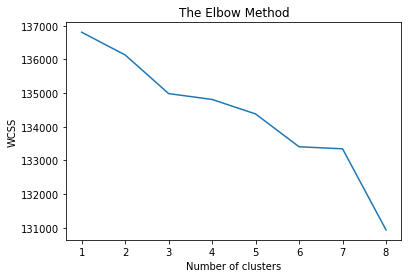

In [158]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
wcss = []
for i in range(1,9):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,9),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

In [161]:
#k = 3,5,6,7
kmeans = KMeans(n_clusters = 7, n_init = 20, n_jobs = 1) # n_init(number of iterations for clsutering) n_jobs(number of cpu cores to use)
kmeans.fit(x)

c:\users\quynh\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


KMeans(n_clusters=7, n_init=20, n_jobs=1)

In [162]:
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : play, doh, role, plug, build, group, floor, puzzle, display, time, enough, ensnare, ensemble, enriched, ø25mm, enormous, enjoys, ensure, enjoying, enjoyed, enjoyable, enjoyment, ensures, ensuring, enthusiasm
1 : fun, toy, includes, kid, surprise, child, color, age, make, barbie, baby, easy, figure, use, game, little, new, lego, included, year, light, fashion, accessory, great, sold
2 : detail, attention, ensure, enters, enterprises, enter, entanglement, ensuring, ensures, ensnare, entertained, ensemble, enriched, enough, enormous, enjoys, enjoyment, enjoying, entertain, ø25mm, enjoyable, entirely, epa, environmentally, environmental
3 : back, swept, transformers, atcha, basics, talk, low, entirely, entire, enjoying, enjoyment, enjoys, enormous, environmental, enough, enriched, ensemble, ensnare, ensure, ensures, ensuring, entanglement, enter, enterprises, enters
4 : feature, packed, rich, ø25mm, enriched, ensuring, ensures, ensure, ensnare, ensemble, enough, enter, enormous, enjoys